# Machine Learning e Data Science com Python de A à Z

# Processamento de linguagem natural com Python

## Importação das bibliotecas

`!pip install -U spacy` <br>
`!python -m spacy download pt_core_news_sm`

In [1]:
import bs4 as bs
import urllib.request
import nltk
import spacy

## Marcação POS
- POS (part-of-speech) atribui para as palavras partes da fala, como substantivos, adjetivos, verbos.
- Importante para a detecção de entidades no texto, pois primeiro é necessário saber o que o texto contém

In [2]:
pln = spacy.load('pt_core_news_sm')
pln

In [3]:
documento = pln('Estou aprendendo processamento de linguagem natural, curso em Fortaleza')

In [4]:
type(documento)

spacy.tokens.doc.Doc

In [5]:
for token in documento:
    print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
, PUNCT
curso NOUN
em ADP
Fortaleza PROPN


## Lematização e stemização

In [6]:
for token in documento:
    print(token.text, token.lemma_)

Estou estar
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural
, ,
curso curso
em em
Fortaleza fortaleza


In [7]:
doc = pln('encontrei encontraram encontrarão encontrariam cursando curso cursei')
[token.lemma_ for token in doc]

['encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'cursar',
 'curso',
 'cursar']

In [8]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')

'aprend'

In [9]:
for token in documento:
    print(token.text, token.lemma_, stemmer.stem(token.text))

Estou estar est
aprendendo aprender aprend
processamento processamento process
de de de
linguagem linguagem lingu
natural natural natur
, , ,
curso curso curs
em em em
Fortaleza fortaleza fortal


## Carregamento dos textos

In [10]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [11]:
dados = dados.read()
dados

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-t

In [12]:
# Retornar tags HTML
dados_html = bs.BeautifulSoup(dados, 'lxml')
dados_html

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-

In [13]:
# Extrair todas as tags <p>
paragrafos = dados_html.find_all('p')

In [14]:
len(paragrafos)

64

In [15]:
paragrafos[0]

<p>A <b>inteligência artificial</b> (de sigla: <b>IA</b>; do <a href="/wiki/L%C3%ADngua_inglesa" title="Língua inglesa">inglês</a>: <i>artificial intelligence</i>, de sigla: <b>AI</b>) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.<sup class="reference" id="cite_ref-:0_1-0"><a href="#cite_note-:0-1"><span>[</span>1<span>]</span></a></sup><sup class="reference" id="cite_ref-:1_2-0"><a href="#cite_note-:1-2"><span>[</span>2<span>]</span></a></sup> É também um conjunto de <a href="/wiki/Tecnologias_emergentes" title="Tecnologias emergentes">novas tecnologias</a> que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,<sup class="reference" id="cite_ref-:1_2-1"><a href="#cite_note-:1-2"><span>[</span>2<span>]</span></a></sup><sup class="reference" id="cite_ref-:2_3-0"><a href="#cite_note-:2-3"><span>[</span>3<span>]</span></a></sup> representanto um <a href="/wiki/Revolu%C3%A7%C3%A3o_da_informa%C3%A7%C3%A3o" title="Revolu

In [16]:
paragrafos[0].text

'A inteligência artificial (de sigla: IA; do inglês: artificial intelligence, de sigla: AI) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1][2] É também um conjunto de novas tecnologias que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,[2][3] representanto um marco histórico na computação moderna.[3] Embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplina.\n'

In [17]:
paragrafos[1]

<p>Algumas das principais áreas relacionadas à IA incluem:
</p>

In [18]:
conteudo = ''
for p in paragrafos:
    conteudo += p.text

In [19]:
conteudo

'A inteligência artificial (de sigla: IA; do inglês: artificial intelligence, de sigla: AI) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1][2] É também um conjunto de novas tecnologias que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,[2][3] representanto um marco histórico na computação moderna.[3] Embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplina.\nAlgumas das principais áreas relacionadas à IA incluem:\nÉ difícil definir especificamente a Inteligência Artificial, mas ao longo do tempo seguiu essas quatro linhas de pensamento:[1]\nÉ um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[4] É possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a 

In [20]:
conteudo = conteudo.lower()
conteudo

'a inteligência artificial (de sigla: ia; do inglês: artificial intelligence, de sigla: ai) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1][2] é também um conjunto de novas tecnologias que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,[2][3] representanto um marco histórico na computação moderna.[3] embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplina.\nalgumas das principais áreas relacionadas à ia incluem:\né difícil definir especificamente a inteligência artificial, mas ao longo do tempo seguiu essas quatro linhas de pensamento:[1]\né um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[4] é possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a 

## Buscas em textos com spaCy

In [21]:
pln = spacy.load('pt_core_news_sm')
pln

In [22]:
string ='turing'
token_pesquisa = pln(string)

In [23]:
pln.vocab

In [24]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab) 
matcher.add('SEARCH', None, token_pesquisa)

In [25]:
doc = pln(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 3463, 3464),
 (8661325627334373315, 3473, 3474),
 (8661325627334373315, 3629, 3630),
 (8661325627334373315, 3634, 3635),
 (8661325627334373315, 3640, 3641),
 (8661325627334373315, 3703, 3704),
 (8661325627334373315, 4356, 4357),
 (8661325627334373315, 5564, 5565),
 (8661325627334373315, 5699, 5700),
 (8661325627334373315, 5794, 5795),
 (8661325627334373315, 5911, 5912)]

In [26]:
doc[3463:3464], doc[2463-5: 2464+5]

(turing, cassino, sendo que vários apostadores podem ser induzidos a dispensar)

In [27]:
doc[3473:3474], doc[3473-5: 3474+5]

(turing, chamou depois de teste de turing (tt),[34] de 1950)

In [28]:
matches[0], matches[0][2]

((8661325627334373315, 3463, 3464), 3464)

In [29]:
from IPython.core.display import HTML
texto = ''
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados encontrados:</strong> {len(matches)} </p> """))

for i in matches:
    inicio = i[1] - numero_palavras
    if inicio < 0:
        inicio = 0
    texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>")
    texto += "<br /><br />"
display(HTML(f"""... {texto} ..."""))

## Extração de entidades nomeadas

- NER (Named-Entity Recognition)
- Encontrar e classificar entidades no texto, dependendo da base de dados que foi utilizada para o treinamento (pessoa, localização, empresa, numéricos)
- Usado em chatbots para saber o assunto falado

In [30]:
for entidade in doc.ents: 
    print(entidade.text, entidade.label_)

pensamento:[1 MISC
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
brasil LOC
allen newell PER
herbert simon PER
mccarty PER
marvin minsky PER
mit ORG
darthmouth LOC
estados unidos LOC
fifth generation MISC
japão LOC
prolog MISC
gpt-3[21 MISC
google ORG
wikipédia MISC
john mccarthy PER
andreas kaplan PER
michael haenlein definem PER
john mccarthy PER
john haugeland PER
good PER
w. grey walter PER
besta de johns hopkins ORG
universidade de princeton LOC
ratio club LOC
inglaterra LOC
david rumelhart PER
isaac asimov PER
steven spielberg PER
robótica.[8 ORG
stephen hawking PER
alan turing PER
turing PER
turing PER
turing PER
turing PER
turing PER
joseph weizenbaum PER
mit ORG
a.l.i.c.e MISC
java MISC
intelligence markup language PER
alicebots LOC
programáveis.[35][36 O

In [31]:
from spacy import displacy
displacy.render(doc, style = 'ent', jupyter = True)

## Nuvem de palavras e stop words

In [32]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'sistema', 'através', 'oito', 'estiveram', 'neste', 'mesmo', 'sobre', 'direita', 'tudo', 'vindo', 'até', 'breve', 'diz', 'ver', 'bom', 'porém', 'era', 'apontar', 'dezanove', 'está', 'iniciar', 'vossa', 'após', 'saber', 'novo', 'posso', 'agora', 'deste', 'pelas', 'por', 'me', 'estive', 'fomos', 'querem', 'maiorias', 'quanto', 'tens', 'vens', 'apoia', 'treze', 'além', 'pode', 'tivestes', 'eles', 'são', 'dezoito', 'tão', 'portanto', 'ser', 'estou', 'números', 'os', 'tenho', 'com', 'comprido', 'elas', 'outros', 'só', 'suas', 'e', 'fora', 'depois', 'porque', 'desde', 'és', 'nossas', 'último', 'perto', 'qual', 'sei', 'terceiro', 'aqueles', 'contudo', 'qualquer', 'o', 'grande', 'tentar', 'ambas', 'cá', 'tendes', 'devem', 'aquela', 'bem', 'sempre', 'meio', 'meus', 'nos', 'teu', 'fazer', 'outras', 'estiveste', 'foste', 'nunca', 'que', 'nossa', 'minha', 'tuas', 'lado', 'teus', 'sabe', 'ora', 'menor', 'dezassete', 'eu', 'toda', 'vinte', 'podem', 'minhas', 'ter', 'tanta', 'cuja', 'esteve', 'muito

In [33]:
len(STOP_WORDS)

416

In [34]:
pln.vocab['usa'].is_stop

True

In [35]:
doc = pln(conteudo)
lista_token = []
for token in doc:
    lista_token.append(token.text)

In [36]:
print(lista_token)

['a', 'inteligência', 'artificial', '(', 'de', 'sigla', ':', 'ia', ';', 'do', 'inglês', ':', 'artificial', 'intelligence', ',', 'de', 'sigla', ':', 'ai', ')', 'é', 'um', 'campo', 'de', 'estudo', 'multidisciplinar', 'que', 'abrange', 'varias', 'áreas', 'do', 'conhecimento.[1][2', ']', 'é', 'também', 'um', 'conjunto', 'de', 'novas', 'tecnologias', 'que', 'permitem', 'aos', 'aparelhos', 'smart', 'executarem', 'várias', 'funções', 'avançadas', 'de', 'modo', 'quase', 'autônomo,[2][3', ']', 'representanto', 'um', 'marco', 'histórico', 'na', 'computação', 'moderna.[3', ']', 'embora', 'seu', 'desenvolvimento', 'tenha', 'avançado', 'mais', 'na', 'ciência', 'da', 'computação', ',', 'sua', 'abordagem', 'interdisciplinar', 'envolve', 'contribuições', 'de', 'diversas', 'disciplina', '.', '\n', 'algumas', 'das', 'principais', 'áreas', 'relacionadas', 'à', 'ia', 'incluem', ':', '\n', 'é', 'difícil', 'definir', 'especificamente', 'a', 'inteligência', 'artificial', ',', 'mas', 'ao', 'longo', 'do', 'tem

In [37]:
len(lista_token)

6307

In [38]:
sem_stop = []
for palavra in lista_token:
    if pln.vocab[palavra].is_stop == False:
        sem_stop.append(palavra)

In [39]:
print(sem_stop)

['inteligência', 'artificial', '(', 'sigla', ':', 'ia', ';', 'inglês', ':', 'artificial', 'intelligence', ',', 'sigla', ':', 'ai', ')', 'campo', 'estudo', 'multidisciplinar', 'abrange', 'varias', 'áreas', 'conhecimento.[1][2', ']', 'conjunto', 'tecnologias', 'permitem', 'aparelhos', 'smart', 'executarem', 'várias', 'funções', 'avançadas', 'modo', 'quase', 'autônomo,[2][3', ']', 'representanto', 'marco', 'histórico', 'computação', 'moderna.[3', ']', 'desenvolvimento', 'tenha', 'avançado', 'ciência', 'computação', ',', 'abordagem', 'interdisciplinar', 'envolve', 'contribuições', 'diversas', 'disciplina', '.', '\n', 'principais', 'áreas', 'relacionadas', 'ia', 'incluem', ':', '\n', 'difícil', 'definir', 'especificamente', 'inteligência', 'artificial', ',', 'longo', 'seguiu', 'linhas', 'pensamento:[1', ']', '\n', 'conceito', 'amplo', 'recebe', 'tantas', 'definições', 'significados', 'diferentes', 'palavra', 'inteligência.[4', ']', 'considerar', 'características', 'básicas', 'desses', 'sist

In [40]:
len(sem_stop)

3644

In [41]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [42]:
from wordcloud import WordCloud
cloud = WordCloud(background_color = 'white', max_words = 100, colormap = color_map)

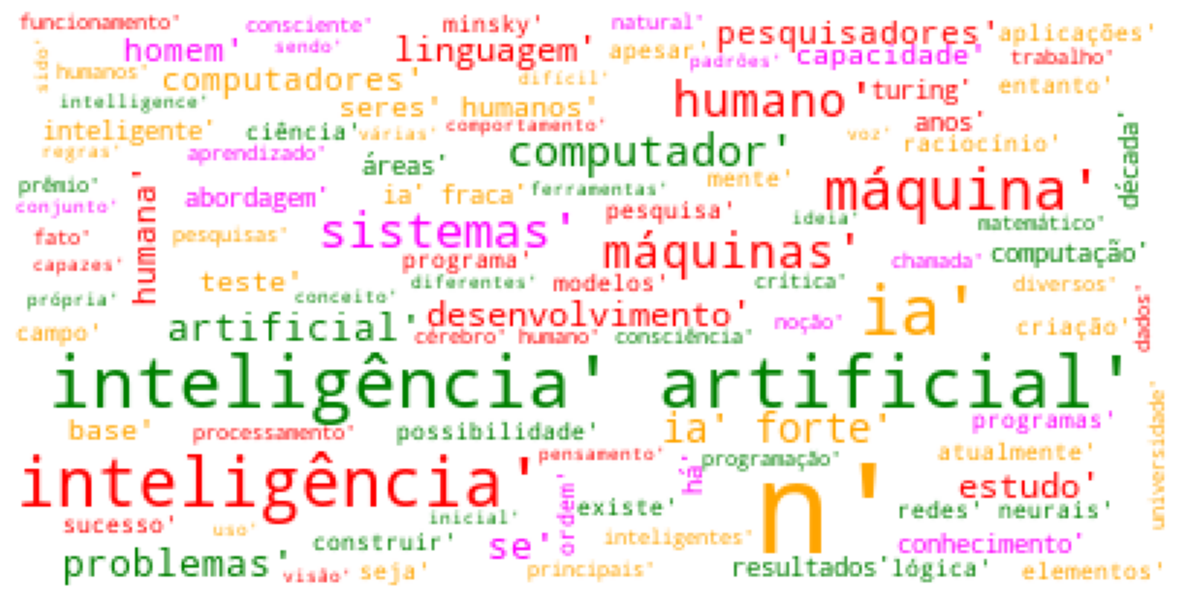

In [43]:
import matplotlib.pyplot as plt
cloud = cloud.generate(str(sem_stop)) # ou (' '.join(sem_stop))
plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()